In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
from tqdm import tqdm
import copy

In [2]:
Types = {'electrique': 6210 , 'thermique':3740 } #le taux de co2 emis a la construction en kg 

CO2emisparkm = {'electrique': 0.02 , 'thermique':0.19 } #le taux de co2 emis par km en kg 

Types_vitesseslimit = {'electrique': 200, 'thermique':150}

Types_perc = {'electrique': 0.5, 'thermique':0.5}

Proba_shortestpath = 0.8 #la proba de choisir le chemin le plus court

nb_voitures = 10

In [3]:
def co2_construction ():
    "renvoie le taux de co2 emis lors de la construction de nos voitures"
    s = 0
    for a in Types_perc : 
        s += Types_perc[a]*nb_voitures*Types[a]
    return s

In [4]:
def co2_emission(distance,typee):
    "prend la distance en km et le type de la voiture et renvoie le taux de co2 emis"
    return distance * CO2emisparkm[typee]

In [5]:
ville_1m = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1] ,
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]] 

In [6]:
paris1m=[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [7]:
def ville_graphe(ville_m,lenmin,lenmax):
    """ Retourn le graphe de la ville à partir de la matrice d'adjacence. ville_m = matrice, lenmin = longueur min des routes,
    lenmax = longueur max des route. Tire aléatoirement la longueur des routes. On suppose que les routes n'ont pas de sens.   
    """
    i = len(ville_m)
    ville_graph = nx.Graph()
    ville_graph.add_nodes_from(range(i))
    ville_graph.add_edges_from([(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1])
    for k in range(i-1):
        L= [(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1]
        for a,b in L : 
             ville_graph.add_edge(a,b, len = random.randint(lenmin,lenmax))
    pos = nx.spring_layout(ville_graph)
    nx.draw_networkx_edges(ville_graph,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(ville_graph, pos)
    nx.draw(ville_graph, pos, with_labels=True)
    return ville_graph

In [8]:
def random_position(len_ville_1m):
    """ Retourne la valeur du node de départ et celui d'arrivée de manière aléatoire. len_ville_1m = nb_colonne matrice"""
    depart = random.randint(0,len_ville_1m -1)
    arrivee = random.randint(0,len_ville_1m -1)
    
    while(depart == arrivee):
        arrivee = random.randint(0,len_ville_1m -1)
    return (depart, arrivee)

In [9]:
def path_choice (proba, ville, positiondepart, positionarrivé): 
    x = random.randint(1,10)
    if x<= proba*10: 
        return nx.shortest_path(ville, source=positiondepart, target=positionarrivé, weight='len', method='dijkstra')
    else : 
        y = nx.all_simple_paths(ville, source=positiondepart, target=positionarrivé)
        L=[]
        for i in y:
            L.append(i)
        rnd = random.randint(0,len(L)-1)
        return  L[rnd]

In [69]:
class Voiture:
    """ Création d'une voiture avec ses différents parametres"""
    nbr_voiture = 0
    def __init__(self,typee,positiondepart,positionarrivé,positionactuelle,vitesse,vitesse_max,villeg):
        self.type = typee
        self.speed = vitesse 
        """position est un tuple d'un tuple de position et d'un pourcentage """
        self.position = positionactuelle
        self.positiondepart = positiondepart
        self.positionarrivé = positionarrivé
        self.vitesse_max =vitesse_max
        "chemin le plus cours a"
        self.chemin = path_choice (Proba_shortestpath,villeg,positiondepart, positionarrivé)
        Voiture.nbr_voiture += 1
    def spawn(typesperc,nbr,lenvillem,villeg,proba):
        """ création de la population de voitures en prenant en compte le pourcentage de voitures éléctriques et terminques"""
        system=[]
        len_ville_1m = lenvillem
        for i in range(round(nbr*typesperc['electrique'])):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            
            a = path_choice (proba,villeg,depart, arrivee)
            
            system.append("voiture"+str(i+1))
            system[i]= Voiture('electrique',depart,arrivee,((depart,a[1]),0.0),50,Types_vitesseslimit['electrique'],villeg)
        
        for j in range(round(nbr*typesperc['thermique']), nbr):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            b = path_choice (proba,villeg,depart, arrivee)
        
            system.append("voiture"+str(j+1))
            system[j]= Voiture('thermique',depart,arrivee,((depart,b[1]),0.0),50,Types_vitesseslimit['thermique'],villeg)
        return system

In [70]:
def liste2tuple(chemin_liste):
    """ transforme une liste en tuple. Permet d'afficher le chemin sous forme de plusieurs tuples.
    chemin liste = liste du plus court chemin enregistré dans voiture.chemin"""
    chemin_tuple = []
    for i in range(len(chemin_liste)-1):
        chemin_tuple.append((chemin_liste[i],chemin_liste[i+1]))
    return chemin_tuple

In [71]:
def indice_chemin(chemin , tuplee):
    """ retourn l'indice du tuple (position) dans le chemin sous forme de liste de tuples. chemin = liste de tuples, 
    tuplee = le tuple / arrete à trouver"""
    for i in range(len(chemin)-1):
        if chemin[i]==tuplee:
            return i
    return 0 

In [72]:
def donne_longueur(tuple1, villeg):
    """ Retourn la longueur entre deux nodes reliés entre eux. """
    length = nx.get_edge_attributes(villeg,'len')
    for (tuple2,l) in length.items():
        if((tuple1[0]==tuple2[0]) and (tuple1[1]==tuple2[1])) or ((tuple1[0]==tuple2[1] )and (tuple1[1]==tuple2[0])) :
            return l
    return -1 

In [73]:
def change_distance(voiture,villeg,verbose=True):
    """ Cette fonction permet de deplacer une voiture pendant 10s. Elle modifie les parametres de la voiture :
    pourcentage de la distance parcouru sur une arrete, changement de node quand on arrive à la fin de l'arrete
    et ajout de la distance parcouru sur la nouvelle arrete"""
    
    chemin_liste = voiture.chemin
    chemin = liste2tuple(chemin_liste)
    distance_parcouru =(voiture.speed*10)/3600
    if voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0],villeg) > 100:
        if voiture.position[0][1]== voiture.positionarrivé:
            voiture.speed=0
            voiture.position=(voiture.position[0],100)
        else:
            if verbose:
                print()
                print("changement d'arrete " + "passage de " +str(chemin[indice_chemin(chemin,voiture.position[0]) - 1]) + " à :" + str(voiture.position[0]))
                print()
            voiture.position = (chemin[indice_chemin(chemin,voiture.position[0]) + 1],0)
        
    
    if voiture.position[1]<100 and voiture.speed!= 0:
        voiture.position = (voiture.position[0],voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0],villeg))  
        

In [74]:
def nb_voiture_edge_temp_reel(population):
    """ cette fonction compte le nombre de voiture sur chaque edge à chaque instant (10s). (u,v) = (v,u)"""
    popu = [v.position[0] for v in population]
    compte ={}
    #print(popu)
    for valeur1, valeur2 in popu:
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte: 
            compte[(valeur1,valeur2)]= popu.count((valeur1,valeur2)) + popu.count((valeur2,valeur1))
        
    return compte

In [75]:
def route_plus_sature(population):
    """ Retourne la liste des edges les plus fréquentés en temps réel """
    A = nb_voiture_edge_temp_reel(population)
    maxi = 0
    maxival = []
    for j,v in A.items():
        if v>maxi:
            maxi = v
            maxiv = j
    maxival.append(maxiv)
   # print(A)
    #print()
    A.pop(maxiv)
    #print()
    #print(A)
    for i,k in A.items():
        if k == maxi:
            maxival.append(i)
    return maxival 

In [76]:
def color_ville_g(ville_g, route_sature):
    """ affiche la ville avec l'arrete ou les arretes les plus fréquentées edgelist permet de choisir les arrete a colorer
    petit probleme à chaque affichage le graph ne garde pas la meme forme il n'est pas figé."""
    pos = nx.spring_layout(ville_g)
    nx.draw_networkx_edges(ville_g, pos,width=5.0, edgelist = route_sature ,edge_color='yellow', style='solid')
    #nx.draw_networkx_edge_labels(ville_g, pos)
    nx.draw(ville_g, pos, with_labels=True)

In [77]:
def route_plus_parcouru_simu(population, Verbose=True):
    """ Cette fonction concatene tous les chemin de la population sous forme de tuples et retourne le ou les tuples 
    possedent le plus d'occurences """
    tout_chemin = []
    compte = {}
    for v in population: 
        tout_chemin = tout_chemin + liste2tuple(v.chemin) # concatene tous les chemins sous forme de tuple 
    
    for valeur1, valeur2 in tout_chemin : # compte le nombre d'occurence de chaques tuples et le met dans un dico 
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte: 
            compte[(valeur1,valeur2)]= tout_chemin.count((valeur1,valeur2)) + tout_chemin.count((valeur2,valeur1))
    
    maxi = 0
    maxival = []
    if Verbose : 
        print(compte)
    for j,v in compte.items(): # permet de trouver le max exactement le même principe que route plus saturée  
        if v>maxi:
            maxi = v
            maxiv = j
    maxival.append(maxiv)
    compte.pop(maxiv)
    for i,k in compte.items():
        if k == maxi:
            maxival.append(i)
    return maxival 

In [78]:
def nombre_voiture_passage_edge(population):
    """ cette fonction concantene les chemin et un hist est creer pour représenter le nbr de voiture qui va passer sur
    chaque edges. petit probleme (u,v)!=(v,u) dans l'hist ils correspondent donc à deux route """
    tout_chemin = []
    compte = {}
    for v in population: 
        tout_chemin = tout_chemin + liste2tuple(v.chemin)
    for valeur1, valeur2 in tout_chemin : # compte le nombre d'occurence de chaques tuples et le met dans un dico 
        if (valeur1,valeur2) and (valeur2,valeur1) not in compte:
            compte[(valeur1,valeur2)]= tout_chemin.count((valeur1,valeur2)) + tout_chemin.count((valeur2,valeur1))

    abscisse = [str((y,x)) for (y,x),i in compte.items() ]
    ordonne = [i for (y,x),i in compte.items()]
    
    plt.bar(abscisse,ordonne)
    

In [79]:
def suppression_routes(villeg, nbroutes, Verbose = True) : 
    "fonction qui prend un graph d'une ville et supprime nbroutes routes et renvoie le nouveau graph"
    ville = villeg.copy()
    for i in range(nbroutes): 
        edges = nx.get_edge_attributes(ville,'len')
        listOfKeys = list(edges.keys())
        x = random.randint(0,len(listOfKeys)-1)
        a,b = listOfKeys[x]
        ville.remove_edge(a, b)
        if Verbose : 
            print("edge : ",a,b," removed")
    return ville

In [80]:
def villes_modifiées (villeg, n):
    "renvoie une liste qui contient la ville d'origine et n autres villes ou on a supprimé des villes au hasard"
    L = [villeg]
    for i in range(n): 
        temp = villeg.copy()
        ville = suppression_routes(temp,random.randint(1,2))
        print()
        L.append(ville)
    return L

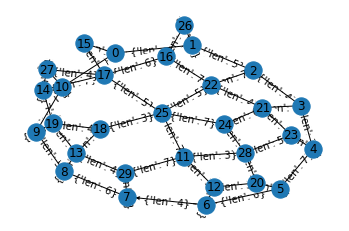

In [81]:
parisg = ville_graphe(paris1m, 3, 7 )

In [83]:
population = Voiture.spawn(Types_perc,nb_voitures,len(ville_1m),parisg,Proba_shortestpath)

In [84]:
def simulation(nbrvoiture,population,lenghtm, villeg, verbose=True, mapp = True, stat=True):
    dictroute = nx.get_edge_attributes(villeg,'len')
    restant = []
    popu = copy.deepcopy(population)
    route_plus_empreinte_simu = route_plus_parcouru_simu(popu,verbose)
    co2emis = 0
    
    if verbose==True:
        print(dictroute)
        for j in popu:
            print(j.chemin)
        print("la route qui sera la plus empreintée lors de la simu est : " + str(route_plus_empreinte_simu))
    
    
    for i in range(10000):
        for v in range(len(popu)):
            change_distance(popu[v], villeg,False)
            co2emis += co2_emission(popu[v].speed*10/3600,popu[v].type)
            if popu[v].position[1]==100 and popu[v] not in restant:
                restant.append(popu[v]) 
            if verbose:
                print("voiture : " + str(v) + " pourcentage = "+ str(popu[v].position[1]) + " tuple pos = " + str(popu[v].position[0]) + " chemin est " + str(popu[v].chemin))
       
        
        
        nb_voiture_par_route = nb_voiture_edge_temp_reel(popu)
        route_sature = route_plus_sature(popu)
        
        if verbose:
            print("\nnombre de voiture sur chaques arretes: " + str(nb_voiture_par_route) + "\n")
            print("la route la plus empreintée est : " + str(route_sature) + " avec : " + str(nb_voiture_par_route[route_sature[0]]) + " voitures")
        
        if mapp:
            color_ville_g(villeg, route_sature)
            plt.show()
        
        if len(restant) == nbrvoiture:
            if verbose:
                print("Toutes les voitures sont arrivées")
                break
    if stat:
        plt.title("nombre de voitures par routes")
        plt.xlabel("nb voitures par routes")
        plt.ylabel("routes")
        print("nous pouvons bien voir que la/les route/s la/les plus empreinté/s est/sont : " + str(route_plus_empreinte_simu))
        nombre_voiture_passage_edge(popu) 
        plt.show()
    
    return co2emis 

In [85]:
simulation(nb_voitures, population,len(paris1m), parisg, False, False, False)

50.14722222222234

## - Ici on prend une ville de départ et on construit avec plusieurs autres villes et chaque ville représente la ville d'origine en lui retirant des routes au hasard.

In [86]:
Villes = villes_modifiées (parisg,10)

edge :  11 28  removed

edge :  14 27  removed
edge :  8 13  removed

edge :  14 19  removed

edge :  13 18  removed

edge :  3 4  removed
edge :  14 19  removed

edge :  8 13  removed
edge :  21 23  removed

edge :  13 18  removed
edge :  24 25  removed

edge :  0 10  removed

edge :  8 9  removed
edge :  23 28  removed

edge :  8 9  removed



In [87]:
def simulations (villes, nbrvoiture,p ,lenghtm, verbose=True, mapp = True, stat=True): 
    x = []
    y = []
    minco2 = simulation(nb_voitures,p,lenghtm,villes[0],verbose,mapp,stat)
    minindice = 0
    for i in range(len(villes)):
        x.append(i)
        temp = simulation(nb_voitures,p,lenghtm,villes[i],verbose,mapp,stat)
        y.append(temp)
        if temp<minco2: 
            minco2 = temp
            minindice = i
        
    plt.xlabel("le numero de la ville")
    plt.ylabel("taux de co2 emis")
    plt.plot(x,y)
    plt.show()
    
    print ('la ville avec le moins demission de co2 est la ville numero',minindice+1)
    pos = nx.spring_layout(villes[minindice])
    nx.draw_networkx_edges(villes[minindice],pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(villes[minindice], pos)
    nx.draw(villes[minindice], pos, with_labels=True)

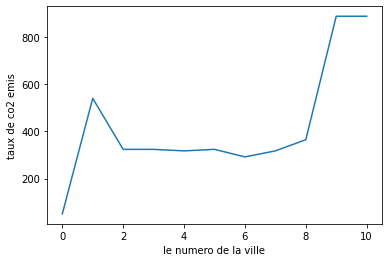

la ville avec le moins demission de co2 est la ville numero 1


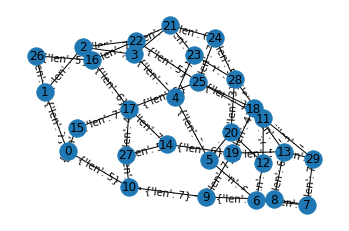

In [88]:
simulations(Villes,nb_voitures, population,len(paris1m), False, False, False)

## -Ici on fait varier le pourcentage de prendre le chemin le plus court

In [89]:
def populations(population,ville): 
    "Prend en paramétre une population d'origine pour avoir les meme parametre et on change seulement le chemin"
    L = []
    for i in range (1,11):
        popu = copy.deepcopy(population)
        for v in popu:
            v.chemin =path_choice (i/10.0,ville,v.positiondepart, v.positionarrivé)
        L.append(popu)
    return L

In [95]:
def simulations2 (ville, nbrvoiture,Listepopu ,lenghtm, verbose=True, mapp = True, stat=True): 
    x = []
    y = []
    minco2 = simulation(nb_voitures,Listepopu[0],lenghtm,ville,verbose,mapp,stat)
    minindice = 0
    for i in range(len(Listepopu)):
        x.append(i)
        temp = simulation(nb_voitures,Listepopu[i],lenghtm,ville,verbose,mapp,stat)
        y.append(temp)
        if temp<minco2: 
            minco2 = temp
            minindice = i
        
    plt.xlabel("le numero de la population")
    plt.ylabel("taux de co2 emis")
    plt.plot(x,y)
    plt.show()
    
    print ('la popilation avec le moins demission de co2 est la population numero',minindice+1)

In [91]:
popu2 = Voiture.spawn(Types_perc,nb_voitures,len(ville_1m),parisg, Proba_shortestpath)

In [92]:
Listepopu = populations(popu2,parisg)

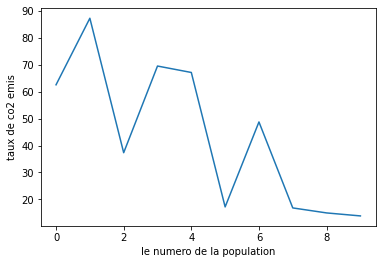

la popilation avec le moins demission de co2 est la population numero 10


In [96]:
simulations2(parisg,nb_voitures, Listepopu,len(paris1m), False, False, False)